In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load Data
df = pd.read_csv('insurance_claims.csv')

# Display basic info
print("Dataset INFO", df.info())

print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df = df.drop(columns=['_c39','police_report_available','property_damage','authorities_contacted'])


In [5]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Separate features and target variable
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through all columns of X
for col in X.columns:
    # Check if the column contains object (string) values
    if X[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        X[col] = label_encoder.fit_transform(X[col].astype(str))  # Convert to str to handle mixed types

# Calculate mutual information
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame with the mutual information values
mi_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])

# Sort by mutual information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                             Mutual Information
vehicle_claim                          2.136698
property_claim                         2.002194
injury_claim                           1.920402
incident_type                          0.478646
collision_type                         0.461900
incident_severity                      0.283548
incident_hour_of_the_day               0.154235
number_of_vehicles_involved            0.123090
policy_number                          0.042885
insured_sex                            0.036202
capital-gains                          0.023585
insured_hobbies                        0.023279
age                                    0.022489
months_as_customer                     0.021726
fraud_reported                         0.020384
incident_state                         0.019203
auto_year                              0.017222
policy_state                           0.017146
policy_annual_premium                  0.013659
incident_date                          0

In [6]:
# Select the relevant features
selected_features = [
    'vehicle_claim', 'property_claim', 'injury_claim', 'incident_type',
    'collision_type', 'incident_severity', 'number_of_vehicles_involved',
]

# Check for missing values in the selected features
missing_values = df[selected_features].isnull().sum()
print(missing_values)


vehicle_claim                  0
property_claim                 0
injury_claim                   0
incident_type                  0
collision_type                 0
incident_severity              0
number_of_vehicles_involved    0
dtype: int64


In [7]:
# Check for unique values in categorical columns
categorical_columns = ['incident_type', 'collision_type', 'incident_severity']
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Unique values in collision_type: ['Side Collision' '?' 'Rear Collision' 'Front Collision']
Unique values in incident_severity: ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


In [8]:
# Replace '?' with 'Unknown' in collision_type
df['collision_type'] = df['collision_type'].replace('?', 'Unknown')

In [9]:
# One-hot encode incident_type and collision_type
df = pd.get_dummies(df, columns=['incident_type', 'collision_type','incident_severity'], drop_first=True)
df['incident_type_Parked Car'] = df['incident_type_Parked Car'].astype(int)
df['incident_type_Single Vehicle Collision'] = df['incident_type_Single Vehicle Collision'].astype(int)
df['incident_type_Vehicle Theft'] = df['incident_type_Vehicle Theft'].astype(int)
df['collision_type_Rear Collision'] = df['collision_type_Rear Collision'].astype(int)
df['collision_type_Side Collision'] = df['collision_type_Side Collision'].astype(int)
df['collision_type_Unknown'] = df['collision_type_Unknown'].astype(int)
df['incident_severity_Minor Damage'] = df['incident_severity_Minor Damage'].astype(int)
df['incident_severity_Total Loss'] = df['incident_severity_Total Loss'].astype(int)
df['incident_severity_Trivial Damage'] = df['incident_severity_Trivial Damage'].astype(int)
# Check the result
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_state                            1000 non-null   object 
 5   policy_csl                              1000 non-null   object 
 6   policy_deductable                       1000 non-null   int64  
 7   policy_annual_premium                   1000 non-null   float64
 8   umbrella_limit                          1000 non-null   int64  
 9   insured_zip                             1000 non-null   int64  
 10  insured_sex                             1000 non-null   objec

In [10]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to be scaled
numerical_features = ['vehicle_claim', 'property_claim', 'injury_claim', 'number_of_vehicles_involved','incident_hour_of_the_day']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features (replace original columns)
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print a sample of the scaled numerical features
print(df[numerical_features].head())

# Check the first few rows to confirm changes
print(df.info())


   vehicle_claim  property_claim  injury_claim  number_of_vehicles_involved  \
0       0.749653        1.165505     -0.189283                    -0.823865   
1      -1.823346       -1.372696     -1.363822                    -0.823865   
2      -0.785565       -0.736072      0.054644                     1.140056   
3       0.677607       -0.219722     -0.224130                    -0.823865   
4      -1.768252       -1.399654     -1.257232                    -0.823865   

   incident_hour_of_the_day  
0                 -0.956261  
1                 -0.524475  
2                 -0.668404  
3                 -0.956261  
4                  1.202666  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                        

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the final features
final_features = [
    'vehicle_claim', 'property_claim', 'injury_claim',
    'incident_type_Parked Car', 'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
    'collision_type_Rear Collision', 'collision_type_Side Collision', 'collision_type_Unknown',
    'incident_severity_Minor Damage', 'incident_severity_Total Loss', 'incident_severity_Trivial Damage',
    'incident_hour_of_the_day', 'number_of_vehicles_involved'
]

# Target variable
target = 'total_claim_amount'

# Extract the final dataset
X = df[final_features]
y = df[target]

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (800, 14), Testing set shape: (200, 14)


**now checking class balance in target variable**

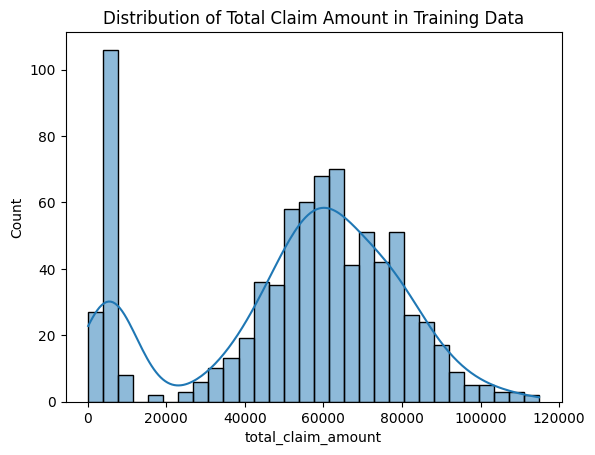

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_train, bins=30, kde=True)
plt.title("Distribution of Total Claim Amount in Training Data")
plt.show()


**Applying log transformation to make it normalize**

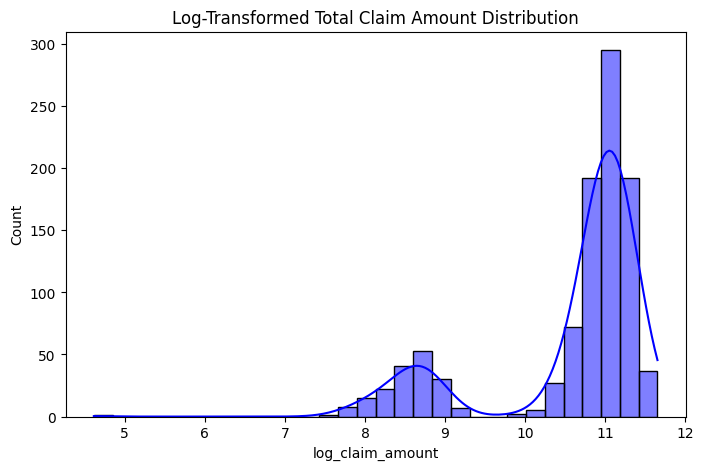

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
df["log_claim_amount"] = np.log1p(df["total_claim_amount"])

# Plot the new distribution
plt.figure(figsize=(8,5))
sns.histplot(df["log_claim_amount"], bins=30, kde=True, color='blue')
plt.title("Log-Transformed Total Claim Amount Distribution")
plt.xlabel("log_claim_amount")
plt.ylabel("Count")
plt.show()


**LOG transformation didn't work and using K-means to make clusters of the target variable**

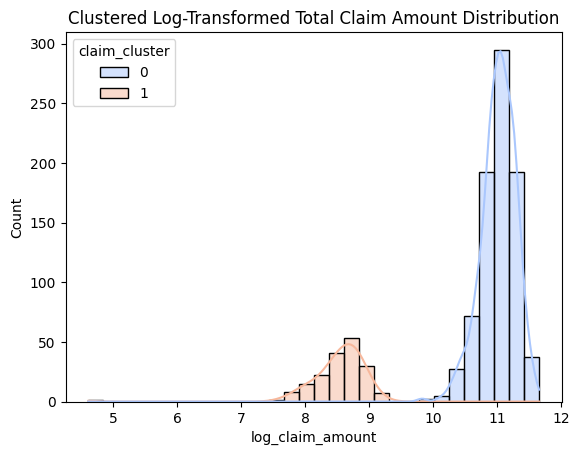

In [14]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure fresh start
df = df.copy()  # If working in Jupyter, prevent overwriting issues

# Use the log-transformed claim amount for clustering
X = df[['log_claim_amount']].values

# Force K-Means to use exactly 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['claim_cluster'] = kmeans.fit_predict(X)

# Plot clusters
sns.histplot(df, x="log_claim_amount", hue="claim_cluster", kde=True, bins=30, palette="coolwarm")
plt.title("Clustered Log-Transformed Total Claim Amount Distribution")
plt.show()


*   using elbow method to determine no of clusters
*   the result is 2



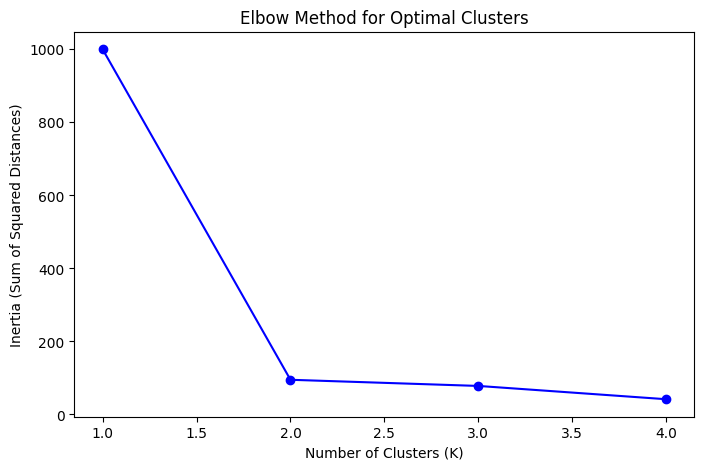

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['log_claim_amount']].values

# Try different numbers of clusters
inertia = []
K_range = range(1, 5)  # Try from 1 to 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia (within-cluster variance)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [16]:
df.groupby("claim_cluster")["log_claim_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
claim_cluster,,,,,,,,
0,822.0,11.016602,0.270241,9.798183,10.865009,11.039251,11.213926,11.652000
1,178.0,8.529209,0.445301,4.615121,8.364857,8.611775,8.786602,9.286468


In [17]:
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... incident_type_Single Vehicle Collision  \
0       466132  ...                       

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
dffinal_features = [
    'vehicle_claim', 'property_claim', 'injury_claim',
    'incident_hour_of_the_day', 'number_of_vehicles_involved','log_claim_amount','claim_cluster']

# Create a new DataFrame containing only the desired features
df = df[dffinal_features]

# If you want to replace the original DataFrame with the new one:
# df = df[dffinal_features]

# To verify the columns in the new DataFrame:
print(df.columns)
print(df.info())

Index(['vehicle_claim', 'property_claim', 'injury_claim',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'log_claim_amount', 'claim_cluster'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle_claim                1000 non-null   float64
 1   property_claim               1000 non-null   float64
 2   injury_claim                 1000 non-null   float64
 3   incident_hour_of_the_day     1000 non-null   float64
 4   number_of_vehicles_involved  1000 non-null   float64
 5   log_claim_amount             1000 non-null   float64
 6   claim_cluster                1000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 50.9 KB
None


In [19]:
cluster_0 = df[df["claim_cluster"] == 0]  # First cluster
cluster_1 = df[df["claim_cluster"] == 1]  # Second cluster
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_0.head())
print(cluster_1.head())

(822, 7)
(178, 7)
   vehicle_claim  property_claim  injury_claim  incident_hour_of_the_day  \
0       0.749653        1.165505     -0.189283                 -0.956261   
2      -0.785565       -0.736072      0.054644                 -0.668404   
3       0.677607       -0.219722     -0.224130                 -0.956261   
5       0.707273       -0.205206     -0.209781                  1.058738   
6       0.642113       -0.051753      2.873127                 -1.675903   

   number_of_vehicles_involved  log_claim_amount  claim_cluster  
0                    -0.823865         11.179004              0  
2                     1.140056         10.453082              0  
3                    -0.823865         11.057235              0  
5                     1.140056         11.068215              0  
6                     1.140056         11.272776              0  
    vehicle_claim  property_claim  injury_claim  incident_hour_of_the_day  \
1       -1.823346       -1.372696     -1.363822     

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'cluster_0' and 'cluster_1' contain the respective cluster data
features = [col for col in cluster_0.columns if col != "log_claim_amount"]  # Exclude target variable

# Split Cluster 0
X0_train, X0_test, y0_train, y0_test = train_test_split(cluster_0[features], cluster_0["log_claim_amount"], test_size=0.2, random_state=42)

# Split Cluster 1
X1_train, X1_test, y1_train, y1_test = train_test_split(cluster_1[features], cluster_1["log_claim_amount"], test_size=0.2, random_state=42)

# Train Random Forest on Cluster 0
model_rf_0 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=42)
model_rf_0.fit(X0_train, y0_train)
y0_pred_rf = model_rf_0.predict(X0_test)

# Train XGBoost on Cluster 0
model_xgb_0 = XGBRegressor(n_estimators=100, learning_rate=0.05, objective='reg:squarederror', random_state=42)
model_xgb_0.fit(X0_train, y0_train)
y0_pred_xgb = model_xgb_0.predict(X0_test)

# Train Random Forest on Cluster 1
model_rf_1 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=42)
model_rf_1.fit(X1_train, y1_train)
y1_pred_rf = model_rf_1.predict(X1_test)

# Train XGBoost on Cluster 1
model_xgb_1 = XGBRegressor(n_estimators=100, objective='reg:squarederror', learning_rate=0.05, random_state=42)
model_xgb_1.fit(X1_train, y1_train)
y1_pred_xgb = model_xgb_1.predict(X1_test)

# Function to Calculate Metrics
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"✅ MSE: {mse:.4f}")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ R² Score: {r2:.4f}")

# Evaluate Models
evaluate_model(y0_test, y0_pred_rf, "Random Forest (Cluster 0)")
evaluate_model(y0_test, y0_pred_xgb, "XGBoost (Cluster 0)")
evaluate_model(y1_test, y1_pred_rf, "Random Forest (Cluster 1)")
evaluate_model(y1_test, y1_pred_xgb, "XGBoost (Cluster 1)")

# Create DataFrame for Actual vs Predicted Values
df_results_0 = pd.DataFrame({'Actual': y0_test, 'RF_Pred': y0_pred_rf, 'XGB_Pred': y0_pred_xgb})
df_results_1 = pd.DataFrame({'Actual': y1_test, 'RF_Pred': y1_pred_rf, 'XGB_Pred': y1_pred_xgb})

# Display Few Results
print("\n📌 Cluster 0 - Actual vs Predicted:")
print(df_results_0.head())

print("\n📌 Cluster 1 - Actual vs Predicted:")
print(df_results_1.head())



📊 Random Forest (Cluster 0) Evaluation Metrics:
✅ MSE: 0.0007
✅ RMSE: 0.0273
✅ R² Score: 0.9888

📊 XGBoost (Cluster 0) Evaluation Metrics:
✅ MSE: 0.0006
✅ RMSE: 0.0251
✅ R² Score: 0.9905

📊 Random Forest (Cluster 1) Evaluation Metrics:
✅ MSE: 0.0018
✅ RMSE: 0.0424
✅ R² Score: 0.9802

📊 XGBoost (Cluster 1) Evaluation Metrics:
✅ MSE: 0.0017
✅ RMSE: 0.0415
✅ R² Score: 0.9811

📌 Cluster 0 - Actual vs Predicted:
        Actual    RF_Pred   XGB_Pred
745  11.305175  11.270333  11.276616
221  10.243560  10.245145  10.264246
80   10.835671  10.843652  10.871030
214  11.306651  11.304914  11.295553
340  11.079076  11.074095  11.087190

📌 Cluster 1 - Actual vs Predicted:
       Actual   RF_Pred  XGB_Pred
98   8.594339  8.546958  8.565557
211  8.865170  8.837728  8.799906
799  8.284252  8.243404  8.264521
160  8.725994  8.624970  8.646326
364  8.627123  8.685108  8.707163


In [23]:
import joblib

# Save the models
joblib.dump(model_xgb_0, "model_xgb_0.pkl")
joblib.dump(model_xgb_1, "model_xgb_1.pkl")


['model_xgb_1.pkl']